In [35]:
import matplotlib.pyplot as plt
import numpy as np 
import os 
plt.rcParams['figure.figsize'] = [16,8]
plt.rcParams.update({'font.size': 12})

In [40]:
# LOAD DATASET
path = r"C:\Users\Eduardo\Documents\CARRERA\University_of_washington\data_sets"
H = np.loadtxt(os.path.join(path,'housing.data'))
A = H[:,:-1] # Other factors
b = H[:,-1]  # Housing values in $1000s

# Understanding the Dataset
print("SHAPES: A:",A.shape," b: ", b.shape)

SHAPES: A: (506, 13)  b:  (506,)


In [41]:
# Pad with ones for nonzero offset
A =  np.pad(A,[(0,0),(0,1)], mode='constant', constant_values=1)
# Understanding the Dataset agian
print("SHAPES: A:",A.shape," b: ", b.shape)

SHAPES: A: (506, 14)  b:  (506,)


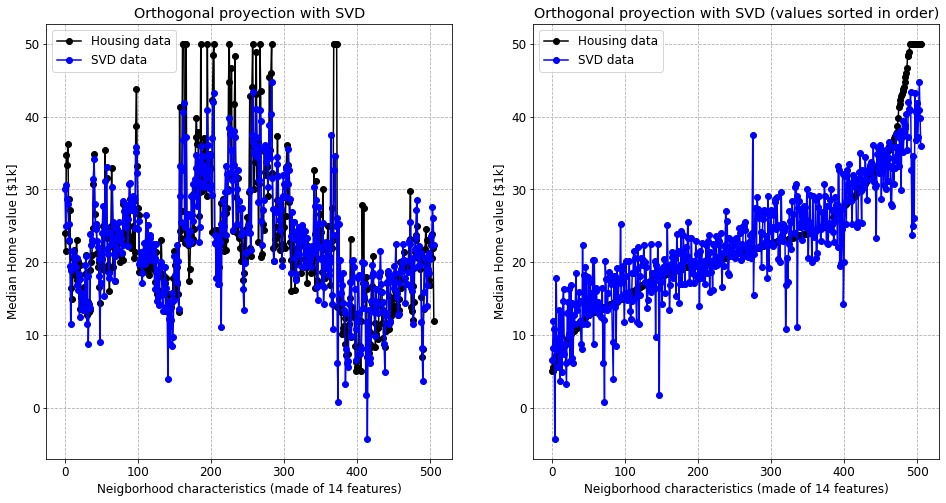

In [42]:
U,S,VT = np.linalg.svd(A,full_matrices=False) # Economy SVD (U till m)
S = np.diag(S)
#xtilde = VS-1UTb
xtilde = VT.T @ np.linalg.inv(S) @ U.T @ b

fig = plt.figure()
ax1 = fig.add_subplot(121)
plt.plot(b,'-o', Color='k', label='Housing data')
plt.plot(A@xtilde,'-o', Color='b', label='SVD data')

plt.title("Orthogonal proyection with SVD")
plt.xlabel('Neigborhood characteristics (made of 14 features)')
plt.ylabel('Median Home value [$1k]')
plt.grid(linestyle="--")
plt.legend()

ax2 = fig.add_subplot(122)
sort_ind = np.argsort(H[:,-1])
b = b[sort_ind] #sorted vales

plt.plot(b,'-o', Color='k', label='Housing data')
plt.plot(A[sort_ind,:]@xtilde,'-o', Color='b', label='SVD data')

plt.title("Orthogonal proyection with SVD (values sorted in order)")
plt.xlabel('Neigborhood characteristics (made of 14 features)')
plt.ylabel('Median Home value [$1k]')
plt.grid(linestyle="--")
plt.legend()

plt.show()

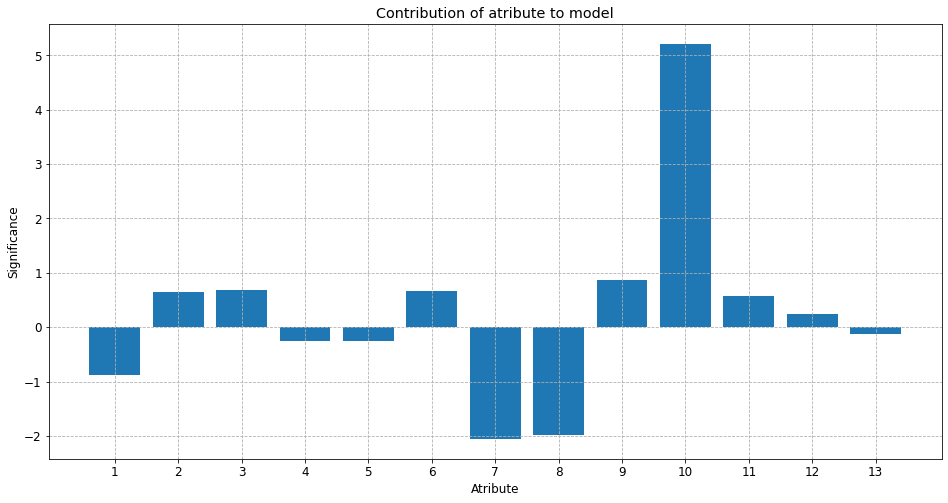

In [77]:
A_mean = np.mean(A,axis=0)
A_mean = A_mean.reshape(-1,1)

#lets compute de covariance matrix and analyze it

A2 = A - np.ones((A.shape[0],1))@A_mean.T
for j in range(A.shape[1]-1):
    A2std = np.std(A2[:,j])
    A2[:,j] = A2[:,j]/A2std
    
A2[:,-1] = np.ones(A.shape[0])

U,S,VT = np.linalg.svd(A2,full_matrices=False) # Economy SVD (U till m)
S = np.diag(S)
#xtilde = VS-1UTb
xtilde = VT.T @ np.linalg.inv(S) @ U.T @ b
x_tick = range(len(xtilde)-1) + np.ones(len(xtilde)-1) #or we could just put a list [1,2,3...13]

plt.bar(x_tick,xtilde[:-1])
plt.xlabel("Atribute")
plt.ylabel("Significance")
plt.title("Contribution of atribute to model")
plt.xticks(x_tick)
plt.grid(linestyle="--")
plt.show()

As we know, In machine learning we have to have a test and validation set

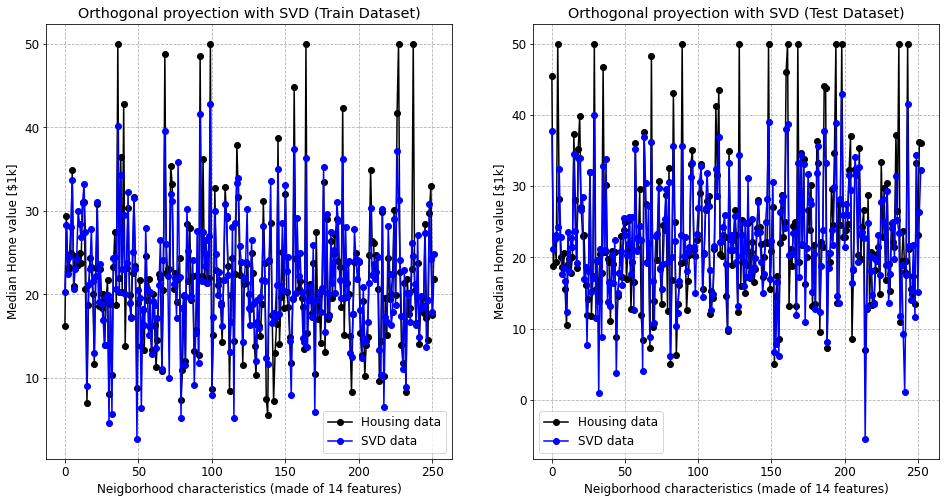

In [93]:
H = np.loadtxt(os.path.join(path,'housing.data'))
A = H[:,:-1] # Other factors
b = H[:,-1]  # Housing values in $1000s

# Pad with ones for nonzero offset
A =  np.pad(A,[(0,0),(0,1)], mode='constant', constant_values=1)

n = 253
p = np.random.permutation(506)
A = A[p,:]
b = b[p]
btrain = b[1:n]
btrain = btrain.reshape(-1,1)
Atrain = A[1:n]
btest = b[n:]
btest = btest.reshape(-1,1)
Atest = A[n:]

# Solve Ax = b using SVD 

U,S,VT = np.linalg.svd(Atrain,full_matrices=False) # Economy SVD (U till m)
S = np.diag(S)
#xtilde = VS-1UTb
xtilde = VT.T @ np.linalg.inv(S) @ U.T @ btrain

fig = plt.figure()
ax1 = fig.add_subplot(121)
plt.plot(btrain,'-o', Color='k', label='Housing data')
plt.plot(Atrain@xtilde,'-o', Color='b', label='SVD data')

plt.title("Orthogonal proyection with SVD (Train Dataset)")
plt.xlabel('Neigborhood characteristics (made of 14 features)')
plt.ylabel('Median Home value [$1k]')
plt.grid(linestyle="--")
plt.legend()

ax2 = fig.add_subplot(122)
plt.plot(btest,'-o', Color='k', label='Housing data')
plt.plot(Atest@xtilde,'-o', Color='b', label='SVD data')

plt.title("Orthogonal proyection with SVD (Test Dataset)")
plt.xlabel('Neigborhood characteristics (made of 14 features)')
plt.ylabel('Median Home value [$1k]')
plt.grid(linestyle="--")
plt.legend()

plt.show()

Bibliography <br> [
Steve Brunton, University of Washingon](https://www.youtube.com/watch?v=vNjLugdaGvs&list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv&index=21)